<h1 align='center'> 9.4 Plotting with seaborn and pandas P II

<h3> Scatter or Point Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

macro = pd.read_csv(r'D:/macrodata.csv')

In [2]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [3]:
trans_data = np.log(data).diff().dropna()

In [4]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


We can then use seaborn’s regplot method, which makes a scatter plot and fits a lin‐ear regression line

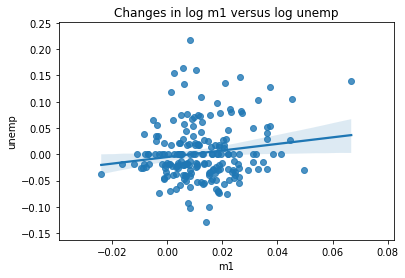

In [5]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
sns.regplot('m1', 'unemp', data=trans_data)

In exploratory data analysis it’s helpful to be able to look at all the scatter plots amonga group of variables; this is known as a pairs plot or scatter plot matrix. Making such aplot  from  scratch  is  a  bit  of  work,  so  seaborn  has  a  convenient  pairplot  function,which  supports  placing  histograms  or  density  estimates  of  each  variable  along  thediagonal 

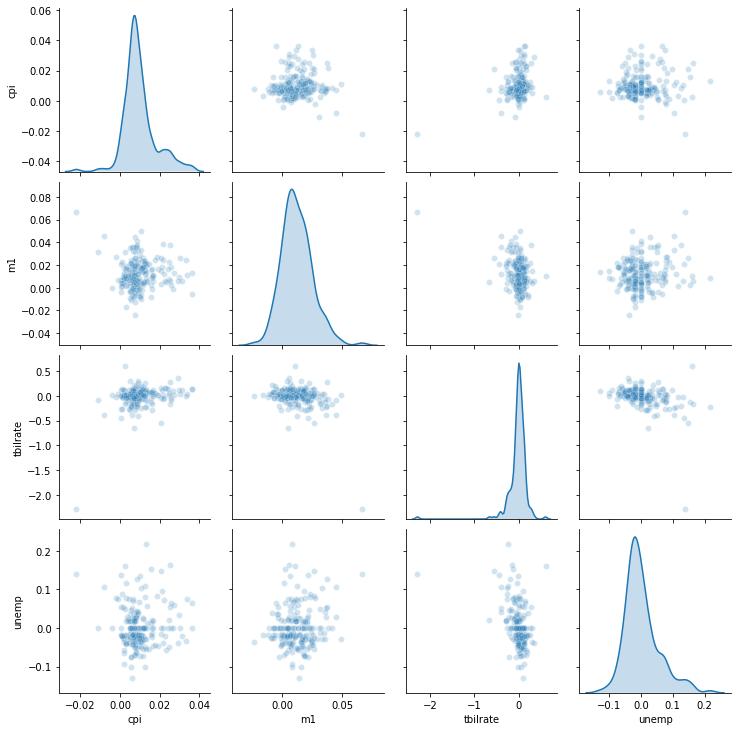

In [6]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})


<h3> Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to vis‐ualize data with many categorical variables is to use a facet grid. 

Seaborn has a usefulbuilt-in function factorplot that simplifies making many kinds of faceted plots 

In [8]:
tips=pd.read_csv(r'D:/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips['tip_pct']=(tips.tip/(tips.tip+tips.total_bill))
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014


E:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


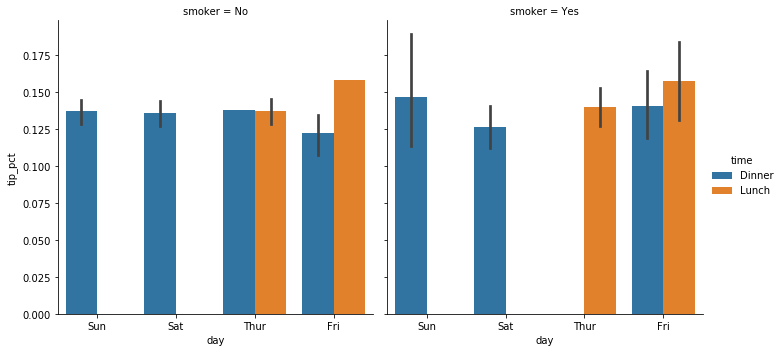

In [13]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead  of  grouping  by  'time'  by  different  bar  colors  within  a  facet,  
we  can  alsoexpand the facet grid by adding one row per time value 

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


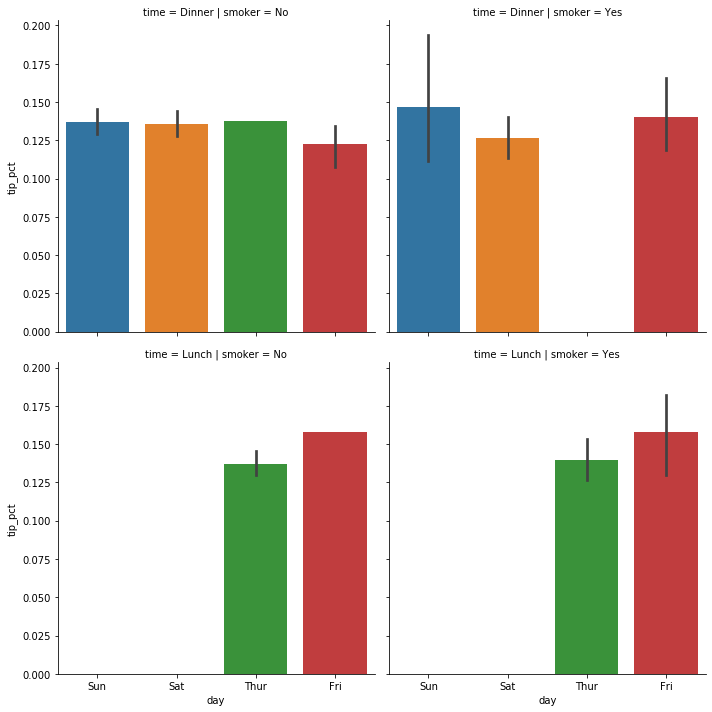

In [14]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

factorplot supports other plot types that may be useful depending on what you aretrying to display.

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


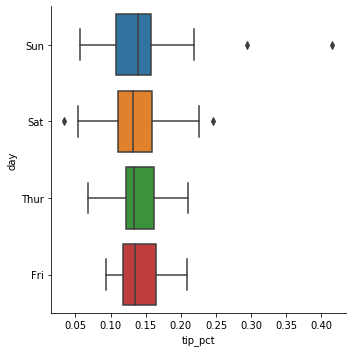

In [15]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

With tools like Bokeh andPlotly,  it’s  now  possible  to  specify  dynamic,  interactive  graphics  in  Python  that  aredestined for a web browser.For  creating  static  graphics  for  print  or  web,  I  recommend  defaulting  to  matplotliband add-on libraries like pandas and seaborn for your needs. For other data visualiza‐tion requirements, it may be useful to learn one of the other available tools out there.I encourage you to explore the ecosystem as it continues to involve and innovate intothe future.